# Haberman's Survival Data - Exploratory data analysis (EDA)

## Description

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Dataset: [https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1]

* Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999
* Number of Instances: 306
* Number of Attributes: 4 (including the class attribute)  
     
     (1) Age of patient at time of operation (numerical)  
     (2) Patient's year of operation (year - 1900, numerical)  
     (3) Number of positive axillary nodes detected (numerical)  
     (4) Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year  


* Objective: Classify a new patient's data as belonging to one of the 2 classes given the 3 features.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [2]:
# (Q) how many data-points and features?
print(haberman.shape)

(306, 4)


In [3]:
#(Q) What are the column names in our dataset?
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
#(Q) How many data points for each class are present? 
#(or) How many patients survived more than 5 years(status=1) or died within 5 year(status=2) are present?

haberman["status"].value_counts()
# balanced-dataset vs imbalanced datasets

status
1    225
2     81
Name: count, dtype: int64

In [5]:
haberman["status"].value_counts(normalize=True) * 100

status
1    73.529412
2    26.470588
Name: proportion, dtype: float64

In [6]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
haberman.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


## High level statistics

In [8]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observation:
(1) Target variable is imbalanced with 73% samples for the patients who survived 5 years or longer(status=1) and only 26% samples for the patients died within 5 years(status=2).  
(2) No missing values in dataset.  

## 2-D Scatter Plot

### Scatter plot for 'age' and 'nodes'

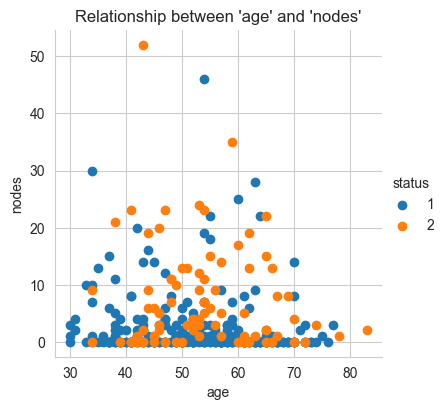

In [10]:
# 2-D Scatter plot with color-coding for each status type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend()

plt.title("Relationship between 'age' and 'nodes'")
plt.show()

### Scatter plot for 'age' and 'year'

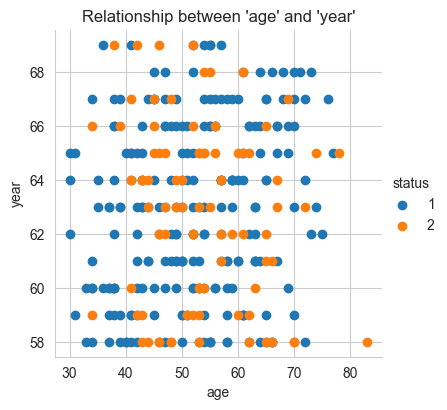

In [11]:
# 2-D Scatter plot with color-coding for each status type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
plt.title("Relationship between 'age' and 'year'")
plt.show()

### Scatter plot for 'year' and 'nodes'

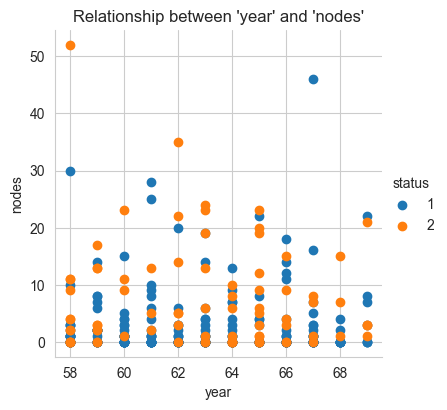

In [12]:
# 2-D Scatter plot with color-coding for each status type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend()
plt.title("Relationship between 'year' and 'nodes'")
plt.show()

**Observation(s):**
1. Seperating status 1 and status 2 is much harder as all the features have considerable overlap.

## Pair-plot

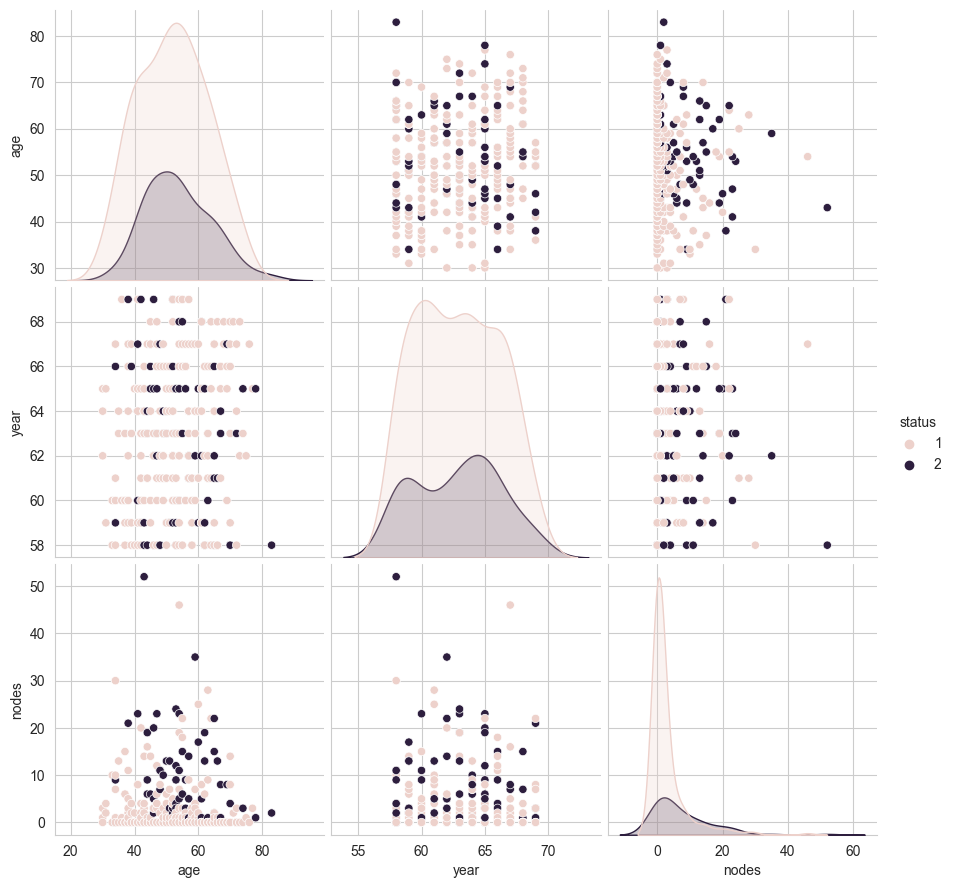

In [13]:
# pairwise scatter plot: Pair-Plot
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", vars=haberman.columns[:-1], height=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. As all the 3 features has considerable overlap, we cannot perfectly classify whether the patient will survive 5 years and more or patient will die within 5 years.

## Histogram, PDF

### PDF for "age"

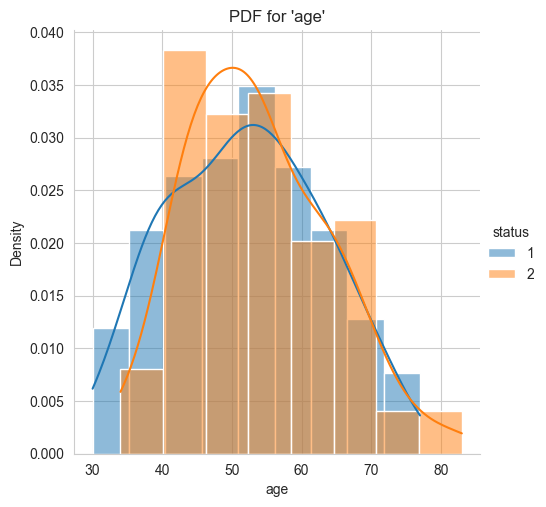

In [16]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.histplot, "age", kde=True, stat="density") \
   .add_legend()
plt.title("PDF for 'age'")
plt.show()

### PDF for "year"

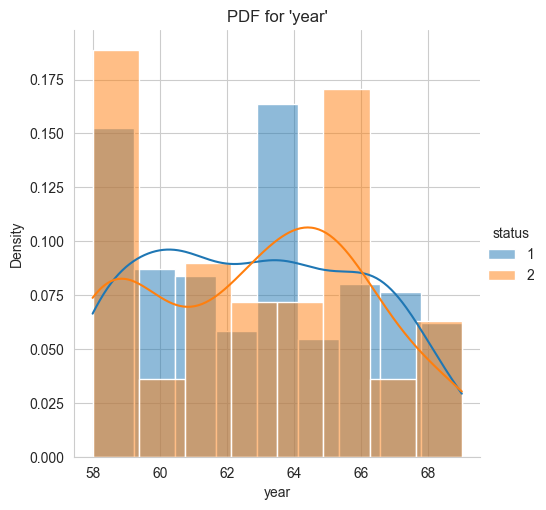

In [17]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.histplot, "year", kde=True, stat="density") \
   .add_legend()
plt.title("PDF for 'year'")
plt.show()

### PDF for "nodes"

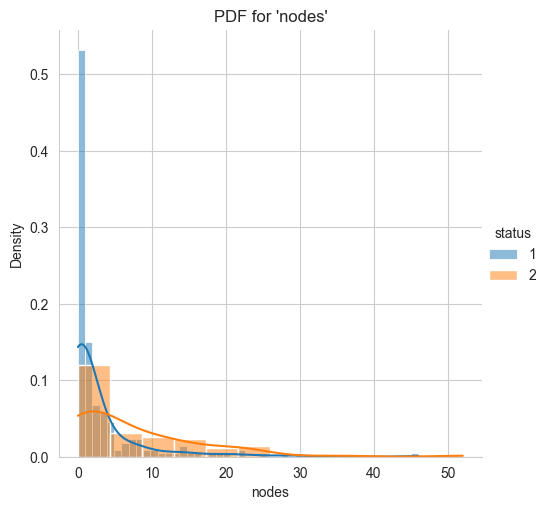

In [18]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.histplot, "nodes", kde=True, stat="density") \
   .add_legend()
plt.title("PDF for 'nodes'")
plt.show()

**Observations**
1. From 58 to 69 has more number of operation.
2. A PDF of all the features also has considerable overlap, we cannot perfectly classify whether the patient will survive 5 years and more or patient will die within 5 years.